## Make a DFT dirty image and dirty beam from a given visibility data

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

onesource.csv is a simulated VLA A-array data from CASA using the function simobserve (https://casa.nrao.edu/docs/TaskRef/simobserve-task.html). Well, it is very straightforward, because there is only one pointsource (2Jy) at the phase centre, so all visibilities are 2+0j. The uvw values are in the unit of wavelength.

In [7]:
X_size = 200 #image size on x-axis
Y_size = 200 #image size on y-axis
Vis = np.loadtxt('onesource.csv', usecols = range(0,5)) # read in visibilities
u = np.transpose(Vis)[0] #u values
v = np.transpose(Vis)[1] #v values
w = np.transpose(Vis)[2] #w values
jj = complex(0,1)
V = np.transpose(Vis)[3] + jj * np.transpose(Vis)[4] #complex visibility values
n_uv = len(u) #length of the data

### Make DFT dirty image (slow map) and DFT dirty beam
Why we call the DFT dirty image a "slow map"? Have a guess!

#### 1. Determine the pixel size

In [15]:
# Make a full map (1000*1000)
X_min = -np.pi / 129600.  #You can change X_min and X_max in order to change the pixel size.
X_max = np.pi / 129600.
X = np.linspace(X_min, X_max, num=X_size+1)[0:X_size]
Y_min = -np.pi / 129600.  #You can change Y_min and Y_max in order to change the pixel size.
Y_max = np.pi / 129600. 
Y = np.linspace(Y_min,Y_max,num=Y_size+1)[0:Y_size]

pixel_resol_x = 180. * 60. * 60. * (X_max - X_min) / np.pi / X_size #pixel size on x-axis
pixel_resol_y = 180. * 60. * 60. * (Y_max - Y_min) / np.pi / Y_size #pixel size on y-axis
print ("The pixel size on x-axis is ", pixel_resol_x, " arcsec") 

The pixel size on x-axis is  0.05  arcsec


#### 2. Make the dirty image and dirty beam
When the field of view is narrow, we have

Dirty image:
$I_D(\textbf{x}) = \Re\Bigg[\sum_{k = 1}^M w_k V_k \exp{(i2\pi\textbf{u}_k \textbf{x})} \Bigg]$
where $M$ is the number of visibility data, and $w_i$ is the weight for each $V_k$. $\textbf{u}_k = (u_k,v_k)$ and $\textbf{x} = (x,y)$ .

Dirty beam:
$B(\textbf{x}) = \Re\Bigg[\sum_{k=1}^M w_k \exp{(i2\pi\textbf{u}_k \textbf{x})}\Bigg]$

In [10]:
I_sum = np.zeros([X_size,Y_size],dtype = np.complex_) # dirty image of X_size x Y_size
B_sum = np.zeros([X_size,Y_size],dtype = np.complex_) # dirty beam of X_size x Y_size

for x_size in range(0,X_size):
    print (x_size)
    for y_size in range(0,Y_size):
        x0 = X[x_size]
        y0 = Y[y_size]
        for i in range(0,n_uv):
            E = 2*np.pi*jj*(u[i]*x0+v[i]*y0)
            I_sum[x_size,y_size] = I_sum[x_size,y_size] + V[i]*np.exp(E) 
            # Since we only need the real part, we can expand np.exp(E) to use np.cos and np.sin instead. Have a try
            B_sum[x_size,y_size] = B_sum[x_size,y_size] + np.exp(E)

B_sum = B_sum/n_uv #rescale
I_sum = I_sum/n_uv #rescale

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


#### 3. Plot
Well, we need to rotate the image a little bit to make it more reader-friendly.

<IPython.core.display.Javascript object>


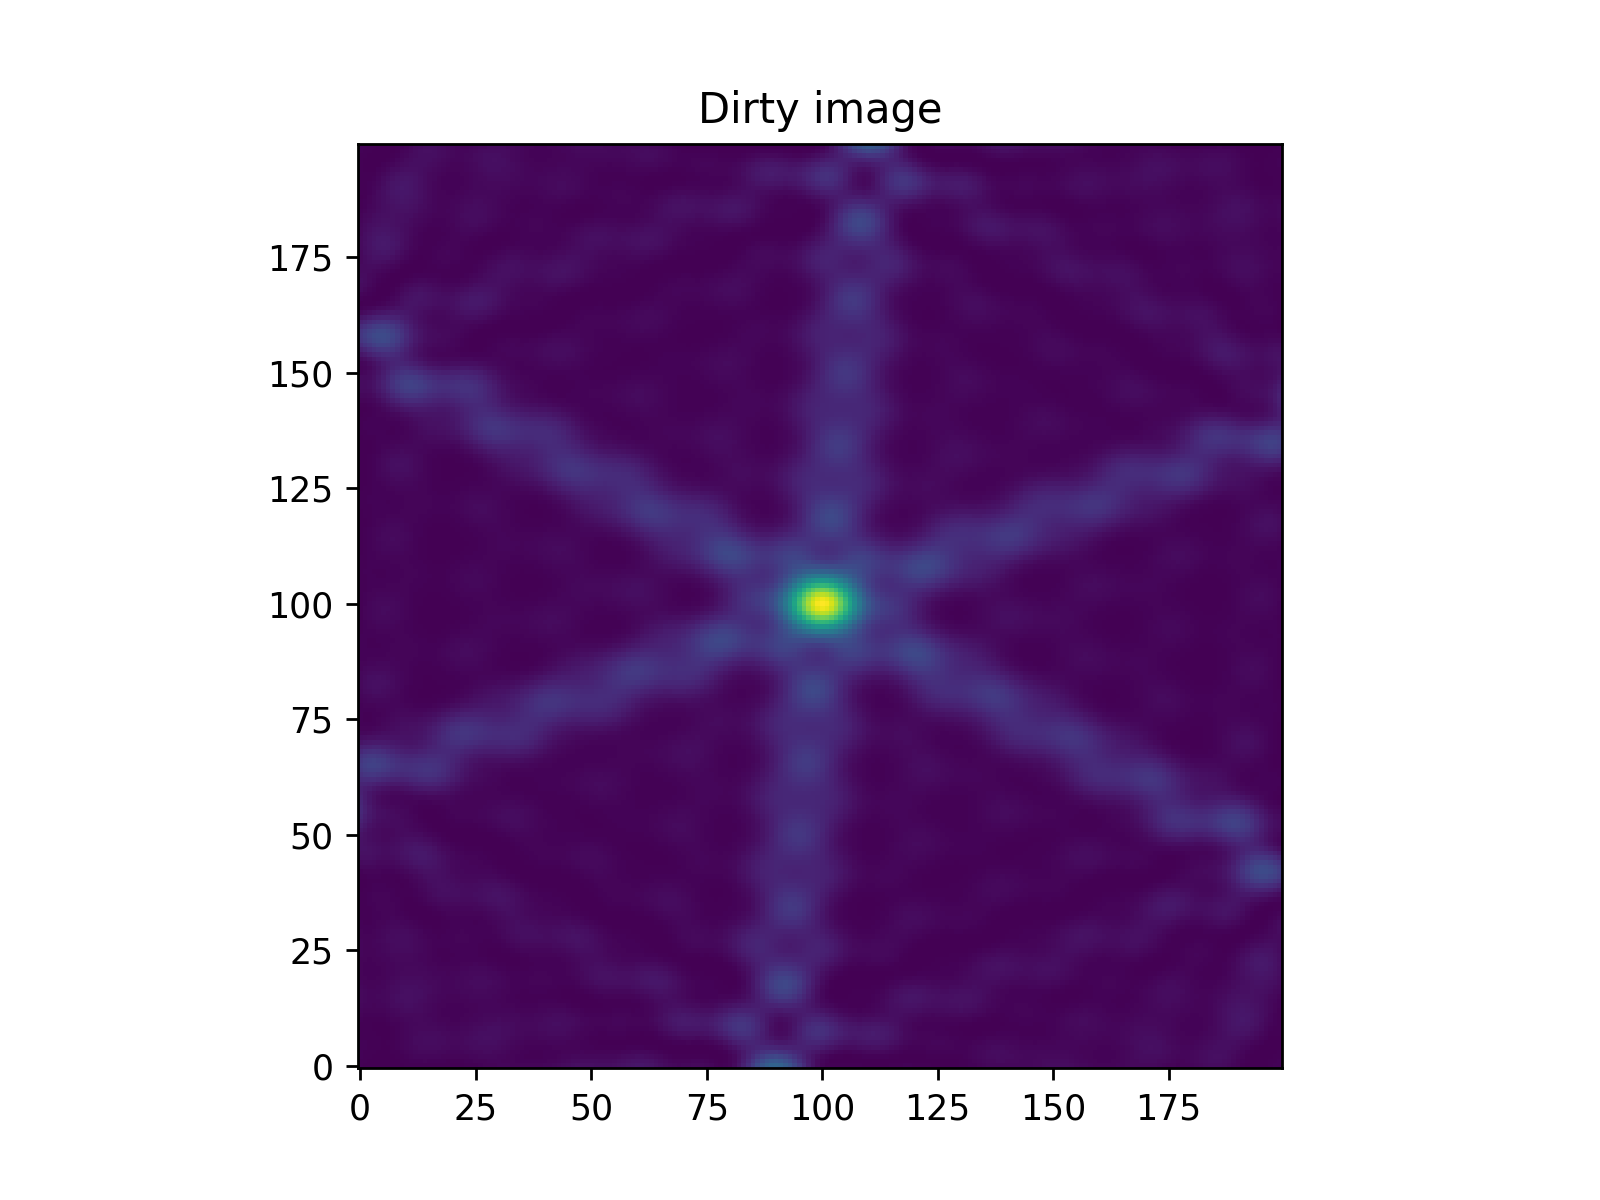

<IPython.core.display.Javascript object>


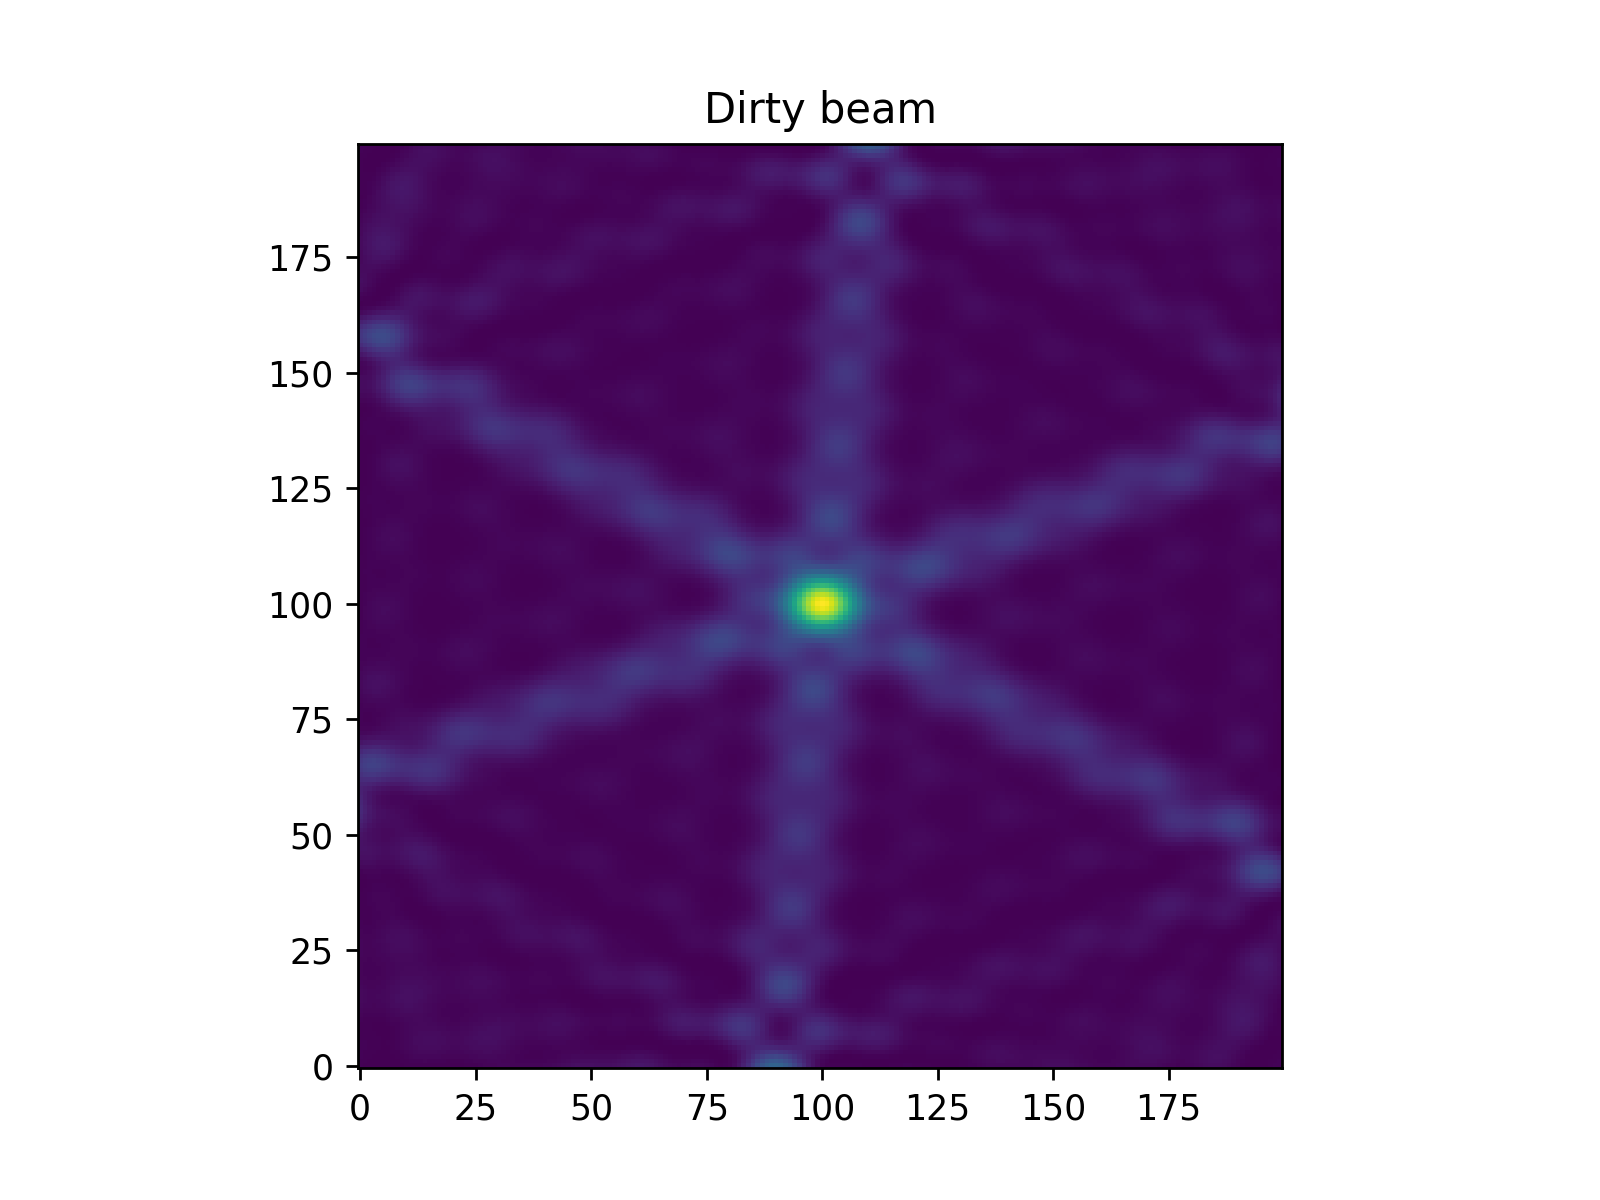

In [17]:
#demonstrate the dirty image and dirty beam directly
plt.figure()
plt.imshow(I_sum.real, origin = 'lower')
plt.title('Dirty image')
plt.figure()
plt.imshow(B_sum.real, origin = 'lower')
plt.title('Dirty beam')
plt.show() # The two images should look the same, do you know why?

In [25]:
def image_rotate(I,im_size):
    '''
    rotate the squre image
    '''
    I_r = np.zeros((im_size,im_size))
    for i in range(im_size):
        for j in range(im_size):
            I_r[i,j] = I[j, im_size-1-i]
    return I_r

<IPython.core.display.Javascript object>


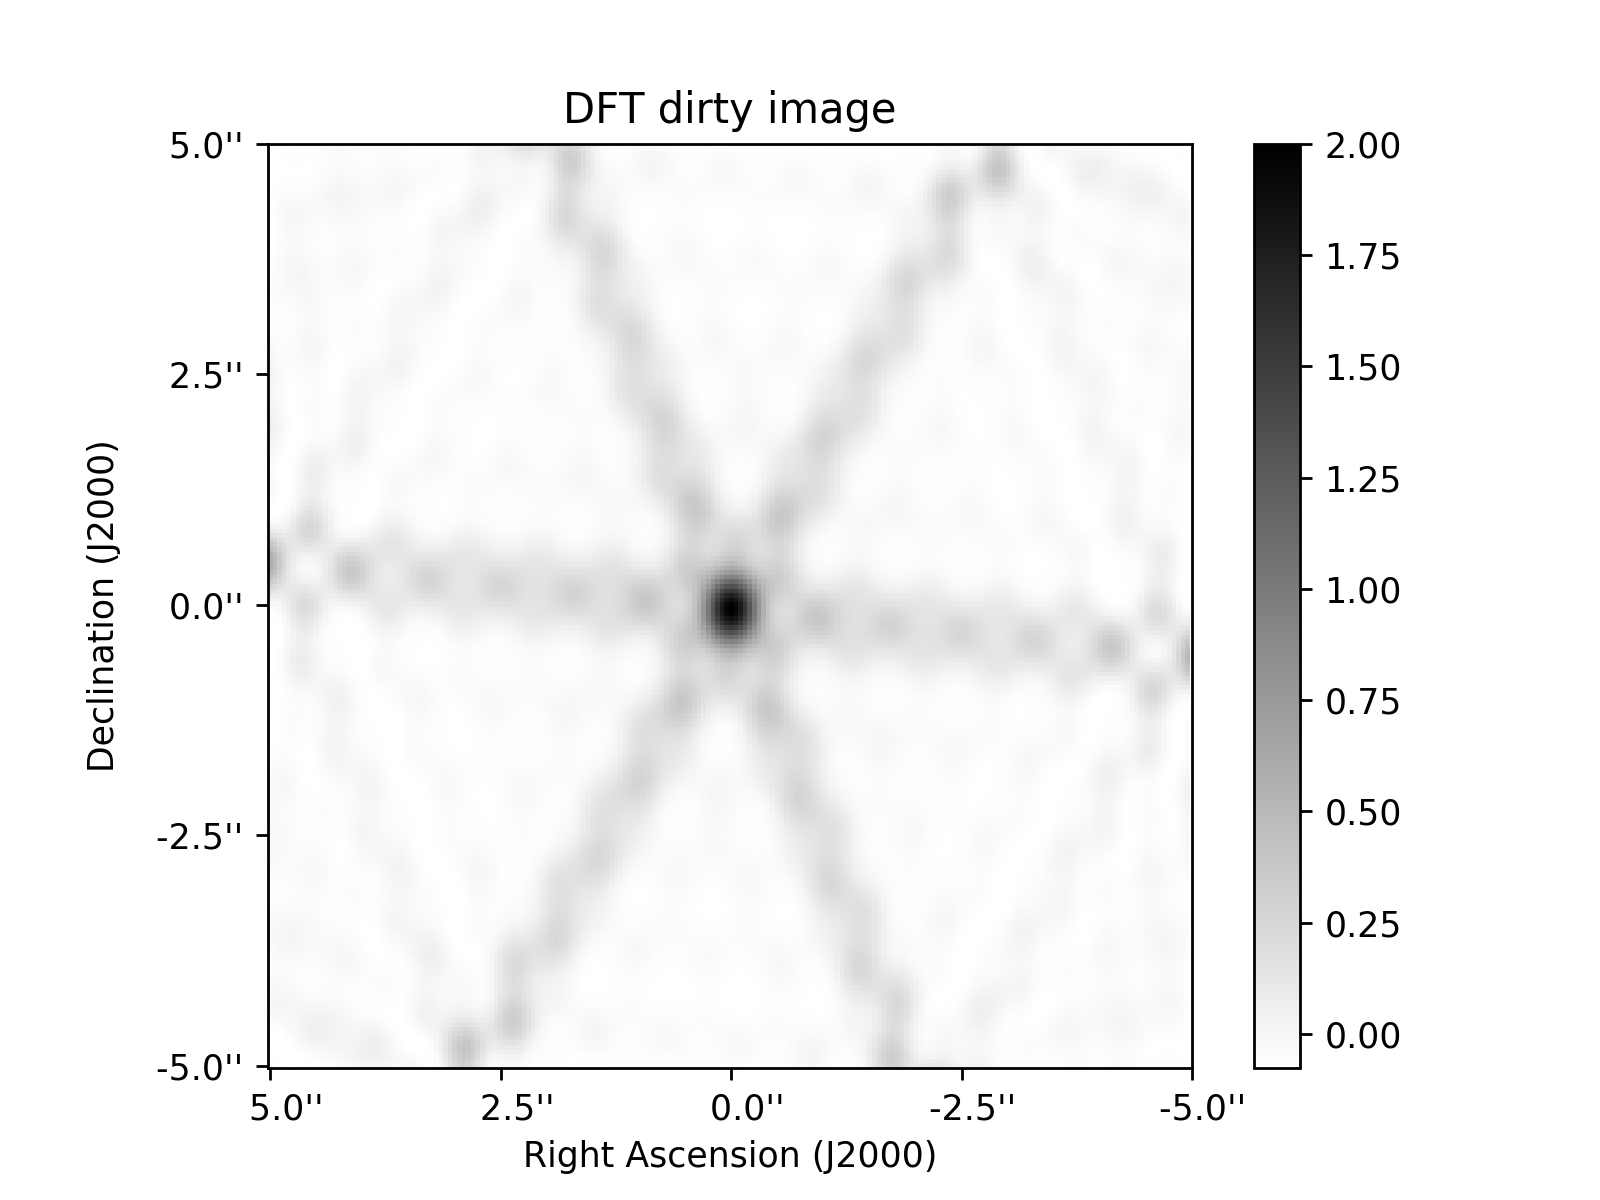

In [26]:
fig1, ax1 = plt.subplots()
I_sum_r = image_rotate(I_sum.real,X_size)
img1 = ax1.imshow(I_sum_r, cmap = 'binary', origin = 'lower')
ticks = np.array((0,50,100,150,200)) #marking the ticks
ticklabelsx = ["{:6.1f}''".format(i) for i in -(ticks-100)*0.05]
ticklabelsy = ["{:6.1f}''".format(i) for i in (ticks-100)*0.05]
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticklabelsx)
ax1.set_yticks(ticks)
ax1.set_yticklabels(ticklabelsy)
ax1.set_title('DFT dirty image')
ax1.set_xlabel('Right Ascension (J2000)')
ax1.set_ylabel('Declination (J2000)')
fig1.colorbar(img1) # colorbar
fig1.show()

You can try to rotate your dirty beam following the similar steps. You will find the maximum flux on the dirty beam should be 1 instead of 2.